# Import Necessary libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
zero_one_colourmap = ListedColormap(('red', 'green'))
from sklearn.decomposition import PCA

# Import dataset

In [2]:
pd.set_option('max_columns',None)

In [3]:
forestfire_data=pd.read_csv("./forestfires.csv")
forestfire_data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...     ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0   

     daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0         0       0       0       0       0       0         0         0   
1         0       0       0       0       1       0         0         0   
2         0       1       0       0       0       0         0         0   
3         0       0       0       0       0       0         0         0   
4         0       0       1       0       0       0         0         0   
..      ...     ...     ...     ...     ...     ...       ...       ...   
512       0       0       1       0       0       0         0         1   
513       0       0       1       0       0       0         0         1   
514       0       0       1       0       0       0         0         1   
515       0       1       0       0       0       0         0         1   
516       0       0       0       0       1       0         0         0   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep size_category  
0           0         0         0         small  
1           0         1         0         small  
2           0         1         0         small  
3           0         0         0         small  
4           0         0         0         small  
..        ...       ...       ...           ...  
512         0         0         0         large  
513         0         0         0         large  
514         0         0         0         large  
515         0         0         0         small  
516         1         0         0         small  

[517 rows x 31 columns]

#  Data Understanding

In [4]:
forestfire_data.shape

(517, 31)

In [5]:
forestfire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
forestfire_data.describe(include='all')

month  day        FFMC         DMC          DC         ISI        temp  \
count    517  517  517.000000  517.000000  517.000000  517.000000  517.000000   
unique    12    7         NaN         NaN         NaN         NaN         NaN   
top      aug  sun         NaN         NaN         NaN         NaN         NaN   
freq     184   95         NaN         NaN         NaN         NaN         NaN   
mean     NaN  NaN   90.644681  110.872340  547.940039    9.021663   18.889168   
std      NaN  NaN    5.520111   64.046482  248.066192    4.559477    5.806625   
min      NaN  NaN   18.700000    1.100000    7.900000    0.000000    2.200000   
25%      NaN  NaN   90.200000   68.600000  437.700000    6.500000   15.500000   
50%      NaN  NaN   91.600000  108.300000  664.200000    8.400000   19.300000   
75%      NaN  NaN   92.900000  142.400000  713.900000   10.800000   22.800000   
max      NaN  NaN   96.200000  291.300000  860.600000   56.100000   33.300000   

                RH        wind        rain         area      dayfri  \
count   517.000000  517.000000  517.000000   517.000000  517.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean     44.288201    4.017602    0.021663    12.847292    0.164410   
std      16.317469    1.791653    0.295959    63.655818    0.371006   
min      15.000000    0.400000    0.000000     0.000000    0.000000   
25%      33.000000    2.700000    0.000000     0.000000    0.000000   
50%      42.000000    4.000000    0.000000     0.520000    0.000000   
75%      53.000000    4.900000    0.000000     6.570000    0.000000   
max     100.000000    9.400000    6.400000  1090.840000    1.000000   

            daymon      daysat      daysun      daythu      daytue  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.143133    0.162476    0.183752    0.117988    0.123791   
std       0.350548    0.369244    0.387657    0.322907    0.329662   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

            daywed    monthapr    monthaug    monthdec    monthfeb  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.104449    0.017408    0.355899    0.017408    0.038685   
std       0.306138    0.130913    0.479249    0.130913    0.193029   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    1.000000    0.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          monthjan    monthjul    monthjun    monthmar    monthmay  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.003868    0.061896    0.032882    0.104449    0.003868   
std       0.062137    0.241199    0.178500    0.306138    0.062137   
min      

## Checking for Outliers 

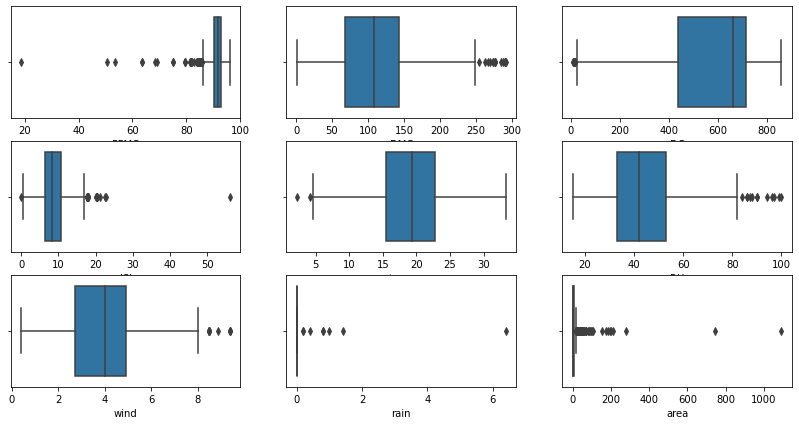

In [8]:
plt.figure(figsize=(14,7))
plt.subplot(3,3,1)
sns.boxplot(forestfire_data["FFMC"])
plt.subplot(3,3,2)
sns.boxplot(forestfire_data["DMC"])
plt.subplot(3,3,3)
sns.boxplot(forestfire_data["DC"])
plt.subplot(3,3,4)
sns.boxplot(forestfire_data["ISI"])
plt.subplot(3,3,5)
sns.boxplot(forestfire_data["temp"])
plt.subplot(3,3,6)
sns.boxplot(forestfire_data["RH"])
plt.subplot(3,3,7)
sns.boxplot(forestfire_data["wind"])
plt.subplot(3,3,8)
sns.boxplot(forestfire_data["rain"])
plt.subplot(3,3,9)
sns.boxplot(forestfire_data["area"])
plt.show()

### Outliers Treatments

In [9]:
q3,q1=np.percentile(forestfire_data["FFMC"],[75,25])
iqr=q3-q1
whiskers=q1-(1.5*iqr)
forestfire_data["FFMC"]=forestfire_data["FFMC"].clip(lower=whiskers)

In [10]:
q3_1,q1_1=np.percentile(forestfire_data["DMC"],[75,25])
iqr_1=q3_1-q1_1
whiskers=q3_1+(1.5*iqr_1)
forestfire_data["DMC"]=forestfire_data["DMC"].clip(upper=whiskers)

In [11]:

q3_2,q1_2=np.percentile(forestfire_data["ISI"],[75,25])
iqr_2=q3_2-q1_2
whiskers=q3_2+(1.5*iqr_2)
forestfire_data["ISI"]=forestfire_data["ISI"].clip(upper=whiskers)


In [12]:

q3_3,q1_3=np.percentile(forestfire_data["RH"],[75,25])
iqr_3=q3-q1
whiskers=q3_3+(1.5*iqr_3)
forestfire_data["RH"]=forestfire_data["RH"].clip(upper=whiskers)

In [13]:

q3_4,q1_4=np.percentile(forestfire_data["wind"],[75,25])
iqr_4=q3_4-q1_4
whiskers=q3_4+(1.5*iqr_4)
forestfire_data["wind"]=forestfire_data["wind"].clip(upper=whiskers)

In [14]:

q3_5,q1_5=np.percentile(forestfire_data["rain"],[75,25])
iqr_5=q3_5-q1_5
whiskers=q3_5+(1.5*iqr_5)
forestfire_data["rain"]=forestfire_data["rain"].clip(upper=whiskers)

In [15]:

q3_6,q1_6=np.percentile(forestfire_data["area"],[75,25])
iqr_6=q3_6-q1_6
whiskers=q3_6+(1.5*iqr_6)
forestfire_data["area"]=forestfire_data["area"].clip(upper=whiskers)

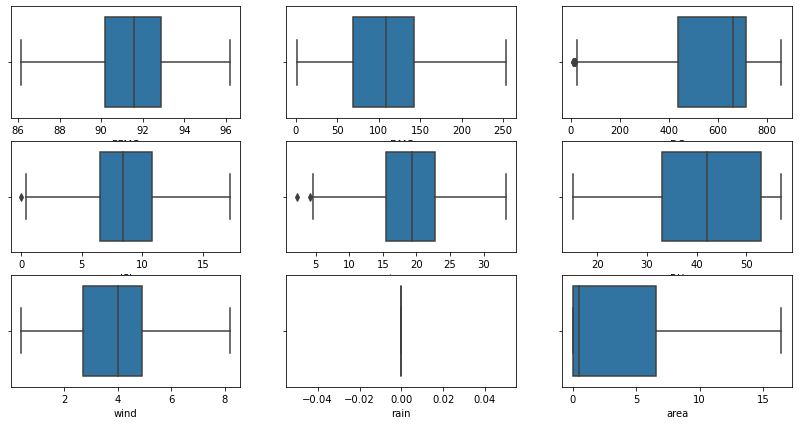

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(3,3,1)
sns.boxplot(forestfire_data["FFMC"])
plt.subplot(3,3,2)
sns.boxplot(forestfire_data["DMC"])
plt.subplot(3,3,3)
sns.boxplot(forestfire_data["DC"])
plt.subplot(3,3,4)
sns.boxplot(forestfire_data["ISI"])
plt.subplot(3,3,5)
sns.boxplot(forestfire_data["temp"])
plt.subplot(3,3,6)
sns.boxplot(forestfire_data["RH"])
plt.subplot(3,3,7)
sns.boxplot(forestfire_data["wind"])
plt.subplot(3,3,8)
sns.boxplot(forestfire_data["rain"])
plt.subplot(3,3,9)
sns.boxplot(forestfire_data["area"])
plt.show()

### observation :
###   Outliers got treated

## Checking For Imbalanced Dataset

In [17]:
forestfire_data["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

## Plots

### Bar plots

<AxesSubplot:>

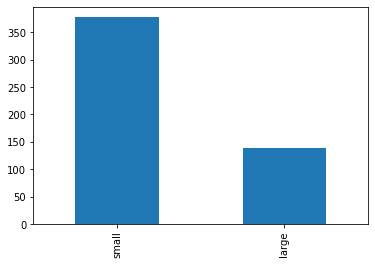

In [18]:
forestfire_data["size_category"].value_counts().plot(kind='bar')

### Pie Plots

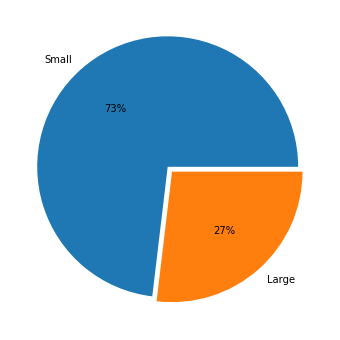

In [19]:
plt.figure(figsize=(10,6))
plt.pie(x=forestfire_data["size_category"].value_counts(),explode=[0.03,0.02],labels=["Small","Large"],autopct='%1.0f%%')
plt.show()

In [20]:
import plotly.graph_objects as go

In [21]:
labels = ["Small","Large"]
values =forestfire_data["size_category"].value_counts()
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0])])
fig.show()

### Observation 
### This is a imbalanced data set 
###  so we need to Adjust class weights in the model building Algorithm

## Correlation Matrix  and Heatmap

In [22]:
forestfire_data.corr()

FFMC       DMC        DC       ISI      temp        RH  \
FFMC      1.000000  0.534013  0.467788  0.795087  0.631834 -0.273328   
DMC       0.534013  1.000000  0.689245  0.374820  0.490349  0.080559   
DC        0.467788  0.689245  1.000000  0.289600  0.496208  0.007168   
ISI       0.795087  0.374820  0.289600  1.000000  0.444945 -0.153620   
temp      0.631834  0.490349  0.496208  0.444945  1.000000 -0.491042   
RH       -0.273328  0.080559  0.007168 -0.153620 -0.491042  1.000000   
wind     -0.084672 -0.108018 -0.197184  0.112194 -0.223780  0.037626   
rain           NaN       NaN       NaN       NaN       NaN       NaN   
area     -0.000823  0.042561  0.047118 -0.006095  0.013190 -0.037422   
dayfri   -0.006601 -0.020351 -0.004220  0.072212 -0.071949  0.068206   
daymon   -0.162472 -0.106074 -0.052993 -0.175973 -0.136529  0.002803   
daysat    0.015418 -0.004694 -0.035189 -0.051766  0.034899 -0.024600   
daysun   -0.057966  0.024224 -0.001431 -0.035230  0.014403  0.127508   
daythu    0.094925  0.090891  0.051859 -0.016147  0.051432 -0.113665   
daytue    0.023779  0.005020  0.028368  0.084996  0.035630 -0.004506   
daywed    0.123116  0.019835  0.024803  0.146541  0.090580 -0.092914   
monthapr -0.193110 -0.202349 -0.268211 -0.119807 -0.157051  0.028777   
monthaug  0.371418  0.519728  0.279361  0.389043  0.351404  0.071258   
monthdec -0.272008 -0.180400 -0.105642 -0.185378 -0.329648 -0.049083   
monthfeb -0.400799 -0.325814 -0.399277 -0.285419 -0.320015  0.149027   
monthjan -0.127352 -0.108335 -0.115064 -0.119187 -0.146520  0.083060   
monthjul  0.024926  0.000112 -0.100887  0.034703  0.142588  0.000336   
monthjun  0.003924 -0.049626 -0.186183  0.027446  0.051015  0.004284   
monthmar -0.204241 -0.416424 -0.650427 -0.155133 -0.341797 -0.114218   
monthmay -0.084713 -0.083880 -0.114209 -0.068586 -0.045540  0.037172   
monthnov -0.089964 -0.076104 -0.078380 -0.088168 -0.053798 -0.040379   
monthoct -0.046776 -0.191578  0.093279 -0.076773 -0.053513 -0.064938   
monthsep  0.087059  0.101162  0.531857 -0.060927  0.088006 -0.044362   

              wind  rain      area    dayfri    daymon    daysat    daysun  \
FFMC     -0.084672   NaN -0.000823 -0.006601 -0.162472  0.015418 -0.057966   
DMC      -0.108018   NaN  0.042561 -0.020351 -0.106074 -0.004694  0.024224   
DC       -0.197184   NaN  0.047118 -0.004220 -0.052993 -0.035189 -0.001431   
ISI       0.112194   NaN -0.006095  0.072212 -0.175973 -0.051766 -0.035230   
temp     -0.223780   NaN  0.013190 -0.071949 -0.136529  0.034899  0.014403   
RH        0.037626   NaN -0.037422  0.068206  0.002803 -0.024600  0.127508   
wind      1.000000   NaN  0.077011  0.114522 -0.065559 -0.062309  0.028482   
rain           NaN   NaN       NaN       NaN       NaN       NaN       NaN   
area      0.077011   NaN  1.000000 -0.030713 -0.006886  0.030423  0.015057   
dayfri    0.114522   NaN -0.030713  1.000000 -0.181293 -0.195372 -0.210462   
daymon   -0.065559   NaN -0.006886 -0.181293  1.000000 -0.180015 -0.193919   
daysat   -0.062309   NaN  0.030423 -0.195372 -0.180015  1.000000 -0.208978   
daysun    0.028482   NaN  0.015057 -0.210462 -0.193919 -0.208978  1.000000   
daythu   -0.064900   NaN -0.032101 -0.162237 -0.149485 -0.161094 -0.173535   
daytue    0.056891   NaN  0.039257 -0.166728 -0.153623 -0.165553 -0.178339   
daywed   -0.017439   NaN -0.019068 -0.151487 -0.139579 -0.150419 -0.162036   
monthapr  0.040390   NaN -0.002868 -0.019140 -0.012171 -0.018534  0.051409   
monthaug  0.033412   NaN -0.051350 -0.100837 -0.130774 -0.009808  0.064566   
monthdec  0.261814   NaN  0.173419 -0.019140  0.114519 -0.058625 -0.024966   
monthfeb -0.035230   NaN  0.002325  0.046323  0.003933  0.020406  0.008416   
monthjan -0.071305   NaN -0.043415 -0.027643 -0.025470  0.057019  0.050887   
monthjul -0.039330   NaN -0.031029 -0.048969 -0.013300  0.060945 -0.018241   
monthjun  0.006573   NaN -0.043726  0.006000  0.017553 -0.022408  0.024540   
monthmar  0.183139   NaN -0.059464  0.036205  0.07712

<AxesSubplot:>

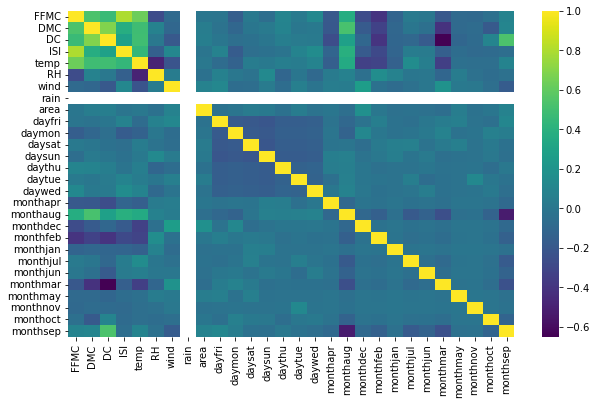

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(forestfire_data.corr(),cmap='viridis')

## Data Preprocessing

In [24]:
forestfire_data.head()

month  day  FFMC   DMC     DC  ISI  temp     RH  wind  rain  area  dayfri  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51.00   6.7   0.0   0.0       1   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33.00   0.9   0.0   0.0       0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33.00   1.3   0.0   0.0       0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  57.05   4.0   0.0   0.0       1   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  57.05   1.8   0.0   0.0       0   

   daymon  daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  \
0       0       0       0       0       0       0         0         0   
1       0       0       0       0       1       0         0         0   
2       0       1       0       0       0       0         0         0   
3       0       0       0       0       0       0         0         0   
4       0       0       1       0       0       0         0         0   

   monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0         0         0         0         0         0         1         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         1         0   
4         0         0         0         0         0         1         0   

   monthnov  monthoct  monthsep size_category  
0         0         0         0         small  
1         0         1         0         small  
2         0         1         0         small  
3         0         0         0         small  
4         0         0         0         small

In [25]:
forestfire_data_1=forestfire_data.copy()

In [26]:
forestfire_data_1=forestfire_data_1.drop(columns=['month','day'],axis=1)

In [27]:
forestfire_data_1.head(2)

FFMC   DMC     DC  ISI  temp    RH  wind  rain  area  dayfri  daymon  \
0  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0   0.0       1       0   
1  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0   0.0       0       0   

   daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  \
0       0       0       0       0       0         0         0         0   
1       0       0       0       1       0         0         0         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   

   monthoct  monthsep size_category  
0         0         0         small  
1         1         0         small

In [28]:
forestfire_data_1["size_category"]=forestfire_data_1["size_category"].astype("category")

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder

In [30]:
std=StandardScaler()

In [31]:
le_encoder=LabelEncoder()

In [32]:
forestfire_data_1["size_category"]=le_encoder.fit_transform(forestfire_data_1["size_category"])

In [33]:
forestfire_data_1.head(2)

FFMC   DMC     DC  ISI  temp    RH  wind  rain  area  dayfri  daymon  \
0  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0   0.0       1       0   
1  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0   0.0       0       0   

   daysat  daysun  daythu  daytue  daywed  monthapr  monthaug  monthdec  \
0       0       0       0       0       0         0         0         0   
1       0       0       0       1       0         0         0         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   

   monthoct  monthsep  size_category  
0         0         0              1  
1         1         0              1

In [34]:
X=forestfire_data_1.drop(columns="size_category",axis=1)
y=forestfire_data_1[["size_category"]]

In [35]:
y.value_counts()

size_category
1                378
0                139
dtype: int64

In [36]:
X.shape,y.shape

((517, 28), (517, 1))

In [37]:
X_scaled=std.fit_transform(X)

In [38]:
X_scaled=pd.DataFrame(data=X_scaled,columns=X.columns)

In [39]:
X_scaled.shape

(517, 28)

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled , y ,test_size = 0.30,random_state = 12,stratify = y)

In [41]:
X_train.shape,y_train.shape

((361, 28), (361, 1))

In [42]:
X_train_df=X_train.copy()

In [43]:
X_train_df["y_train"]=y_train

In [44]:
X_test_df=X_test.copy()

In [45]:
X_test_df["y_test"]=y_test

In [46]:
X_test.shape,y_test.shape

((156, 28), (156, 1))

In [47]:
y.value_counts()

size_category
1                378
0                139
dtype: int64

In [48]:
X_scaled

FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -2.023755 -1.354080 -1.830477 -0.971708 -1.842640  0.810270  1.541587   
1   -0.278531 -1.205507  0.488891 -0.559272 -0.153278 -0.744494 -1.772819   
2   -0.278531 -1.071468  0.560715 -0.559272 -0.739383 -0.744494 -1.544240   
3    0.157774 -1.239420 -1.898266  0.033605 -1.825402  1.332843 -0.001326   
4   -0.794166 -0.948734 -1.798600  0.188269 -1.291012  1.332843 -1.258515   
..        ...       ...       ...       ...       ...       ...       ...   
512 -2.043587 -0.861528  0.474768 -1.796579  1.536084 -0.830869 -0.744211   
513 -2.043587 -0.861528  0.474768 -1.796579  0.519019  1.332843  1.027282   
514 -2.043587 -0.861528  0.474768 -1.796579  0.398350  1.332843  1.541587   
515  1.228707  0.580598  0.269382  0.626482  1.156839  0.032888 -0.001326   
516 -2.043587 -1.728742 -1.780442 -2.002797 -1.222058 -0.917245  0.284398   

     rain      area    dayfri    daymon    daysat    daysun    daythu  \
0     0.0 -0.696673  2.254407 -0.408709 -0.440449 -0.474467 -0.365748   
1     0.0 -0.696673 -0.443576 -0.408709 -0.440449 -0.474467 -0.365748   
2     0.0 -0.696673 -0.443576 -0.408709  2.270410 -0.474467 -0.365748   
3     0.0 -0.696673  2.254407 -0.408709 -0.440449 -0.474467 -0.365748   
4     0.0 -0.696673 -0.443576 -0.408709 -0.440449  2.107630 -0.365748   
..    ...       ...       ...       ...       ...       ...       ...   
512   0.0  0.411358 -0.443576 -0.408709 -0.440449  2.107630 -0.365748   
513   0.0  2.129322 -0.443576 -0.408709 -0.440449  2.107630 -0.365748   
514   0.0  1.223455 -0.443576 -0.408709 -0.440449  2.107630 -0.365748   
515   0.0 -0.696673 -0.443576 -0.408709  2.270410 -0.474467 -0.365748   
516   0.0 -0.696673 -0.443576 -0.408709 -0.440449 -0.474467 -0.365748   

       daytue    daywed  monthapr  monthaug  monthdec  monthfeb  monthjan  \
0   -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   
1    2.660475 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   
2   -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   
3   -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   
4   -0.375873 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   
..        ...       ...       ...       ...       ...       ...       ...   
512 -0.375873 -0.341512 -0.133103  1.345282 -0.133103 -0.200603 -0.062318   
513 -0.375873 -0.341512 -0.133103  1.345282 -0.133103 -0.200603 -0.062318   
514 -0.375873 -0.341512 -0.133103  1.345282 -0.133103 -0.200603 -0.062318   
515 -0.375873 -0.341512 -0.133103  1.345282 -0.133103 -0.200603 -0.062318   
516  2.660475 -0.341512 -0.133103 -0.743339 -0.133103 -0.200603 -0.062318   

     monthjul  monthjun  monthmar  monthmay   monthnov  monthoct  monthsep  
0   -0.256865 -0.184391  2.928152 -0.062318  -0.044023 -0.172860 -0.706081  
1   -0.256865 -0.184391 -0.341512 -0.062318  -0.044023  5.785038 -0.706081  
2   -0.256865 -0.184391 -0.341512 -0.062318  -0.044023  5.785038 -0.706081  
3   -0.256865 -0.184391  2.928152 -0.062318  -0.044023 -0.172860 -0.706081  
4   -0.256865 -0.184391  2.928152 -0.062318  -0.044023 -0.172860 -0.706081  
..        ...       ...       ...       ...        ...       ...       ...  
512 -0.256865 -0.184391 -0.341512 -0.062318  -0.044023 -0.172860 -0.706081  
513 -0.256865 -0.184391 -0.341512 -0.062318  -0.044023 -0.172860 -0.706081  
514 -0.256865 -0.184391 -0.341512 -0.062318  -0.044023 -0.172860 -0.706081  
515 -0.256865 -0.184391 -0.341512 -0.062318  -0.044023 -0.172860 -0.706081  
516 -0.256865 -0.184391 -0.341512 -0.062318  22.715633 -0.172860 -0.706081  

[517 rows x 28 columns]

In [49]:
X_dataframe=X_scaled[["FFMC","DMC"]]
X_dataframe["size_category"]=forestfire_data_1[["size_category"]]
X_dataframe

FFMC       DMC  size_category
0   -2.023755 -1.354080              1
1   -0.278531 -1.205507              1
2   -0.278531 -1.071468              1
3    0.157774 -1.239420              1
4   -0.794166 -0.948734              1
..        ...       ...            ...
512 -2.043587 -0.861528              0
513 -2.043587 -0.861528              0
514 -2.043587 -0.861528              0
515  1.228707  0.580598              1
516 -2.043587 -1.728742              1

[517 rows x 3 columns]

In [50]:
X_data=X_dataframe.iloc[: , :-1]
y_data=X_dataframe.iloc[:,-1]

In [51]:
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_data,y_data ,test_size = 0.30,random_state = 12,stratify = y_data)

In [52]:
X_data

FFMC       DMC
0   -2.023755 -1.354080
1   -0.278531 -1.205507
2   -0.278531 -1.071468
3    0.157774 -1.239420
4   -0.794166 -0.948734
..        ...       ...
512 -2.043587 -0.861528
513 -2.043587 -0.861528
514 -2.043587 -0.861528
515  1.228707  0.580598
516 -2.043587 -1.728742

[517 rows x 2 columns]

### PCA Transform for Visualisation Of the Decision Boundary

In [53]:
pca = PCA(n_components=2)

In [54]:
transformed = pca.fit_transform(X_scaled)

In [55]:
variance = pca.explained_variance_ratio_
variance

array([0.15350237, 0.07121448])

In [56]:
np.cumsum(np.round(a = variance,decimals=4)*100)

array([15.35, 22.47])

In [57]:
transformed.shape

(517, 2)

In [58]:
transformed_df = pd.DataFrame(data=transformed, columns = ['PC1','PC2'])
transformed_df

PC1       PC2
0    4.246744  1.278369
1    0.603326 -0.792216
2    0.879390 -1.001710
3    2.906198  1.432229
4    2.733245  1.180762
..        ...       ...
512  0.378459 -0.183577
513  1.151769 -0.135348
514  1.251139  0.082534
515 -1.941041  1.161364
516  4.289907  0.629724

[517 rows x 2 columns]

In [59]:
transformed_df["size_category"]=forestfire_data_1[["size_category"]]

In [60]:
transformed_df

PC1       PC2  size_category
0    4.246744  1.278369              1
1    0.603326 -0.792216              1
2    0.879390 -1.001710              1
3    2.906198  1.432229              1
4    2.733245  1.180762              1
..        ...       ...            ...
512  0.378459 -0.183577              0
513  1.151769 -0.135348              0
514  1.251139  0.082534              0
515 -1.941041  1.161364              1
516  4.289907  0.629724              1

[517 rows x 3 columns]

In [61]:
X_pca=transformed_df.iloc[: , :-1]
y_pca=transformed_df.iloc[:,-1]

In [62]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_pca , y_pca ,test_size = 0.30,random_state = 12,stratify = y_pca)

## Model Building

##  Kernel - Linear
### Model Training | Model Testing | Model Evaluation

Overall Accuracy :  0.9615
Precision        :  1.0
Recall           :  0.9474
AUC Score        :  0.9737
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

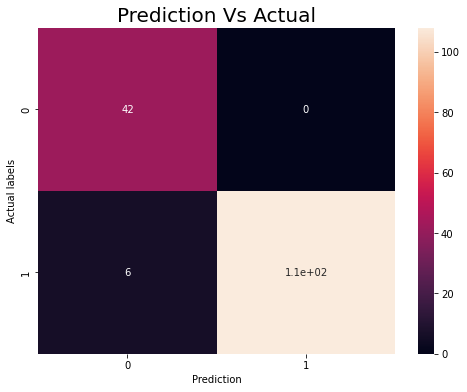

In [63]:
svc_classifier_1 = SVC(kernel='linear',class_weight={1 : 1,  0 : 2.72})
svc_classifier_1.fit(X_train,y_train)
y_pred = svc_classifier_1.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

In [64]:
confusion_matrix(y_test,y_pred)

array([[ 42,   0],
       [  6, 108]], dtype=int64)

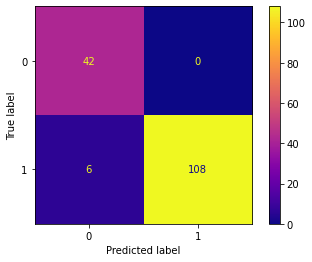

In [65]:
plot_confusion_matrix(svc_classifier_1, X_test, y_test, cmap="plasma")

##  Kernel - Rbf
### Model Training with scaling | Model Testing | Model Evaluation 

Overall Accuracy :  0.9423
Precision        :  0.9907
Recall           :  0.9298
AUC Score        :  0.953
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

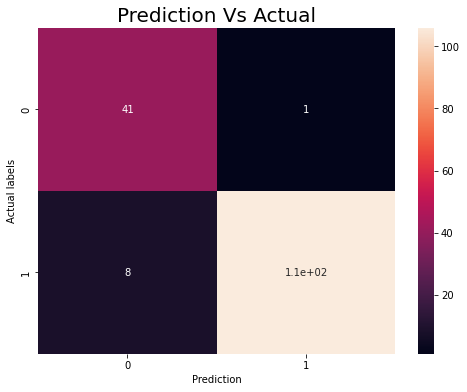

In [66]:
svc_classifier_2 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72})
svc_classifier_2.fit(X_train,y_train)
y_pred = svc_classifier_2.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,annot=True
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

In [67]:
confusion_matrix(y_test,y_pred)

array([[ 41,   1],
       [  8, 106]], dtype=int64)

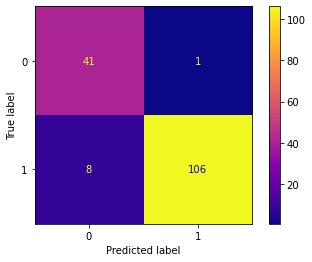

In [68]:
plot_confusion_matrix(svc_classifier_2, X_test, y_test, cmap="plasma")

##   Kernel - Polynomial
### Model Training with scaling | Model Testing | Model Evaluation

Overall Accuracy :  0.891
Precision        :  0.876
Recall           :  0.9912
AUC Score        :  0.8051
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

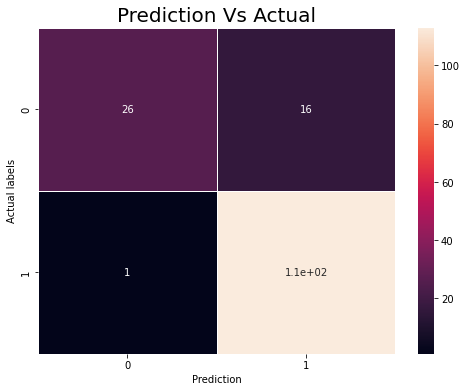

In [69]:
svc_classifier_3 = SVC(kernel='poly',degree = 3) #When poly degree = 1, it is a linear kernel
svc_classifier_3.fit(X_train,y_train)
y_pred = svc_classifier_3.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

In [70]:
confusion_matrix(y_test,y_pred)

array([[ 26,  16],
       [  1, 113]], dtype=int64)

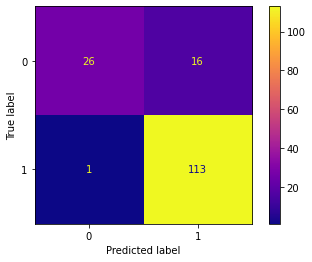

In [71]:
plot_confusion_matrix(svc_classifier_3, X_test, y_test, cmap="plasma")

###  Observation 
###   1.Linear Kernel performs good :  
###   2.RBF  Kernel performs good :


### Key features:

### 1.Good accuracy score
### 2. small number of Misclassification

##  Understanding the Pattern of the data

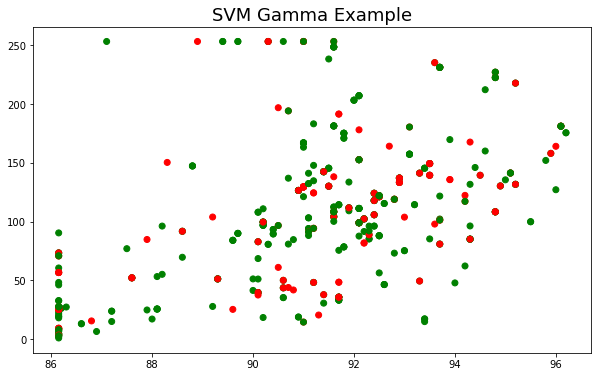

In [72]:
#scatter plot of my dataset
plt.figure(figsize=(10,6))
plt.title("SVM Gamma Example", fontsize=18)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y.values, cmap=zero_one_colourmap)
plt.show()

# Decision Boundary Plotting :

##  Decision Boundary Function

### Contour Plot and Scatter Plot function

In [73]:
def plot_decision_boundary(X_pca, y_pca, clf):
    X_set, y_set = X_pca, y_pca
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, 
                                 stop = X_set.iloc[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set.iloc[:, 1].min() - 1, 
                                 stop = X_set.iloc[:, 1].max() + 1, 
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    plt.scatter(transformed_df["PC1"], transformed_df["PC2"], c=transformed_df["size_category"], cmap=zero_one_colourmap)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

In [74]:
def plot_decision_boundary_1(X_data, y_data, clf):
    X_set, y_set = X_data, y_data
    X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, 
                                 stop = X_set.iloc[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set.iloc[:, 1].min() - 1, 
                                 stop = X_set.iloc[:, 1].max() + 1, 
                                 step = 0.01))
    plt.figure(figsize=(10,6))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    plt.scatter(X_dataframe["FFMC"], X_dataframe["DMC"], c=X_dataframe["size_category"], cmap=zero_one_colourmap)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

### 1.Linear Kernel

In [75]:
svc_classifier_8 = SVC(kernel='linear',class_weight={1 : 1,  0 : 2.72})
svc_classifier_8.fit(X_train_2,y_train_2)

SVC(class_weight={0: 2.72, 1: 1}, kernel='linear')

No handles with labels found to put in legend.


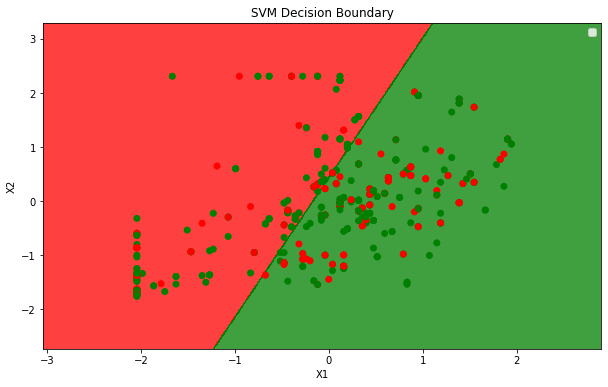

In [76]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_8)

### 2.RBF Kernel

In [77]:
svc_classifier_9 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72})
svc_classifier_9.fit(X_train_2,y_train_2)

SVC(class_weight={0: 2.72, 1: 1})

No handles with labels found to put in legend.


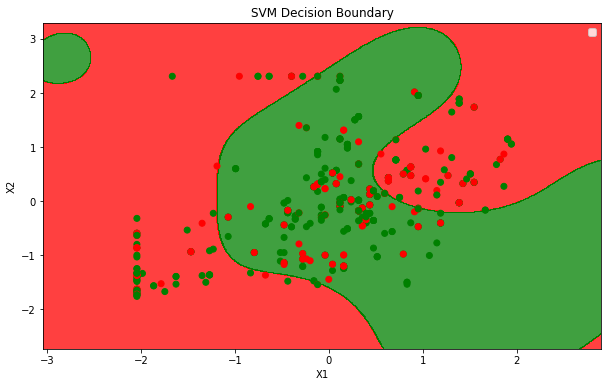

In [78]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_9)

In [79]:
svc_classifier_12 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72}, C=1.0, degree=3, gamma=1.0)
svc_classifier_12.fit(X_train_2,y_train_2)

SVC(class_weight={0: 2.72, 1: 1}, gamma=1.0)

No handles with labels found to put in legend.


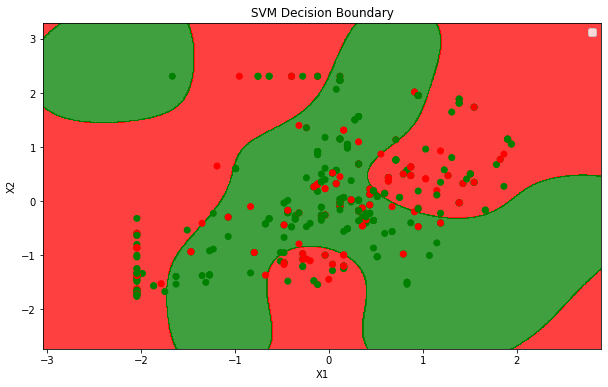

In [80]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_12)

In [81]:
svc_classifier_13 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72}, C=5.0, degree=3, gamma=1.0)
svc_classifier_13.fit(X_train_2,y_train_2)

SVC(C=5.0, class_weight={0: 2.72, 1: 1}, gamma=1.0)

No handles with labels found to put in legend.


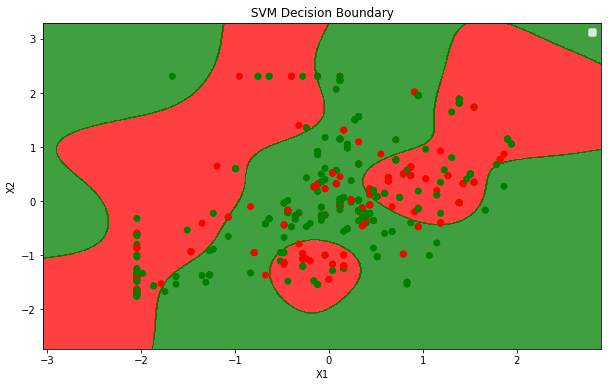

In [82]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_13)

### 3. Polynomial Kernel

In [83]:
svc_classifier_10 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72})
svc_classifier_10.fit(X_train_2,y_train_2)

SVC(class_weight={0: 2.72, 1: 1}, kernel='poly')

No handles with labels found to put in legend.


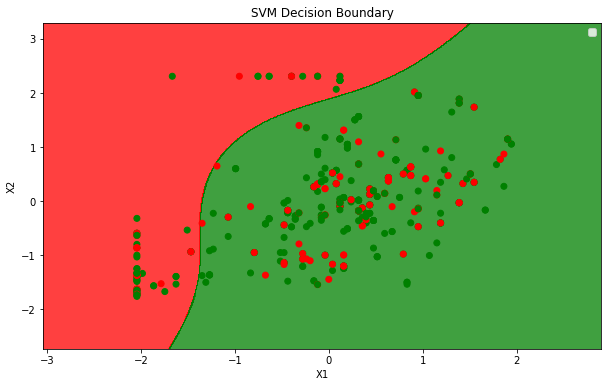

In [84]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_10)

In [85]:
svc_classifier_11 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72}, C=1.0, degree=3, gamma=1.0)
svc_classifier_11.fit(X_train_2,y_train_2)

SVC(class_weight={0: 2.72, 1: 1}, gamma=1.0, kernel='poly')

No handles with labels found to put in legend.


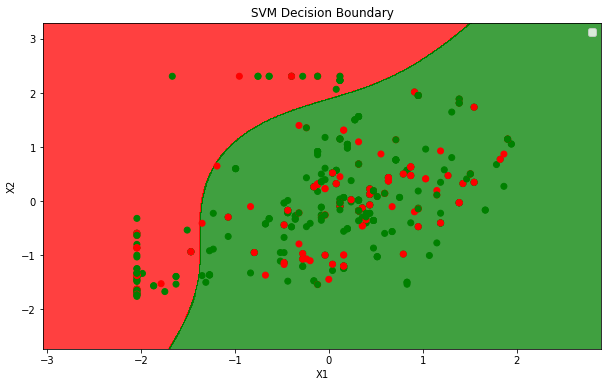

In [86]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_11)

## Plotting of Decision Boundary with PCA Transform  Features 

###  Scatter Plot :PCA Transform ->

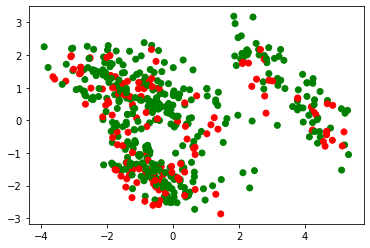

In [102]:
plt.scatter(transformed_df["PC1"], transformed_df["PC2"], c=transformed_df["size_category"], cmap=zero_one_colourmap)

### a).Linear Kernel

In [87]:
svc_classifier_2 = SVC(kernel='linear',class_weight={1 : 1,  0 : 2.72})
svc_classifier_2.fit(X_train_1,y_train_1)

SVC(class_weight={0: 2.72, 1: 1}, kernel='linear')

No handles with labels found to put in legend.


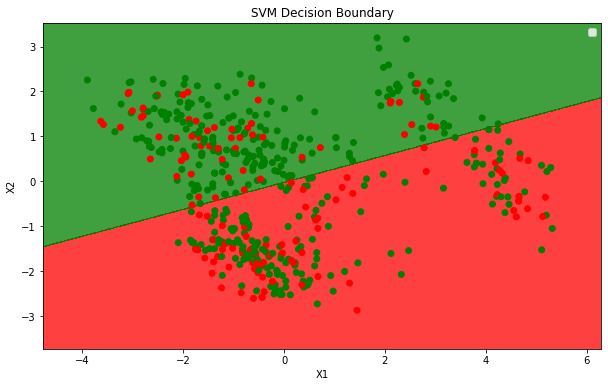

In [88]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_2)

### b). Rbf Kernel

In [90]:
svc_classifier_3 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72})
svc_classifier_3.fit(X_train_1,y_train_1)

SVC(class_weight={0: 2.72, 1: 1})

No handles with labels found to put in legend.


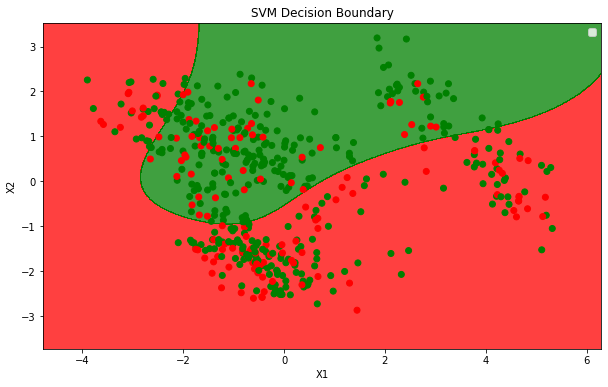

In [91]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_3)

### c). polynomial Kernel

In [92]:
svc_classifier_4 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72}, C=1.0, degree=3, gamma='scale')
svc_classifier_4.fit(X_train_1,y_train_1)

SVC(class_weight={0: 2.72, 1: 1}, kernel='poly')

No handles with labels found to put in legend.


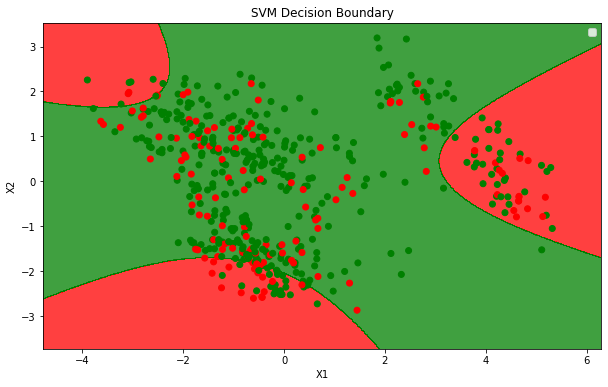

In [93]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_4)

### Tweaking Gamma   and  C values

In [94]:
svc_classifier_5 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72}, C=1.0, degree=3, gamma=0.1)
svc_classifier_5.fit(X_train_1,y_train_1)

SVC(class_weight={0: 2.72, 1: 1}, gamma=0.1, kernel='poly')

No handles with labels found to put in legend.


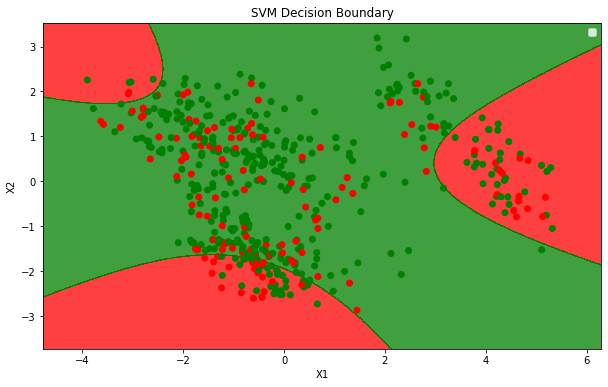

In [95]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_5)

In [96]:
svc_classifier_6 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72}, C=1.0, degree=3, gamma=1.0)
svc_classifier_6.fit(X_train_1,y_train_1)

SVC(class_weight={0: 2.72, 1: 1}, gamma=1.0, kernel='poly')

No handles with labels found to put in legend.


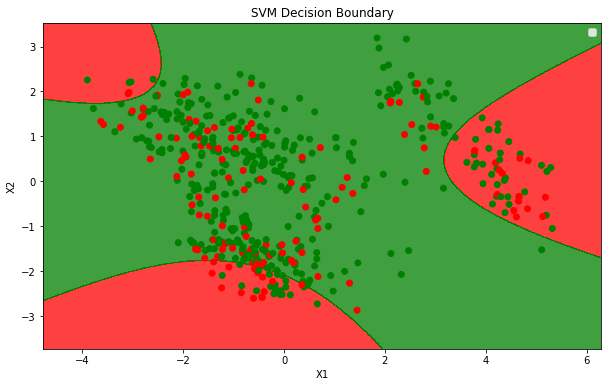

In [97]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_6)

In [98]:
svc_classifier_7 = SVC(kernel='poly',class_weight={1 : 1,  0 : 2.72}, C=5, degree=3, gamma=1.0)
svc_classifier_7.fit(X_train_1,y_train_1)

SVC(C=5, class_weight={0: 2.72, 1: 1}, gamma=1.0, kernel='poly')

No handles with labels found to put in legend.


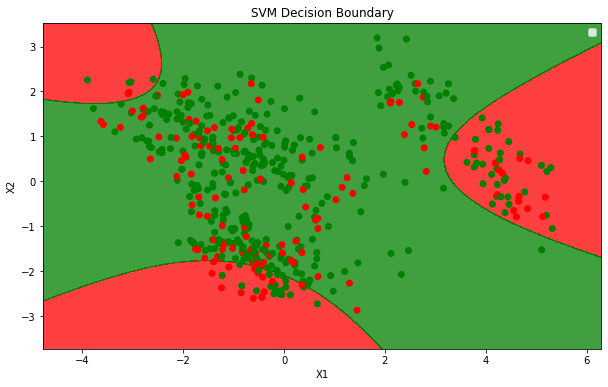

In [99]:
plot_decision_boundary(X_test_1,y_test_1, svc_classifier_7)

## HyperParameter Tweaking (GridsearchCV)

In [100]:
from sklearn.model_selection import GridSearchCV

In [122]:
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid , cv=5)
grid.fit(X_data, y_data)

best_params = grid.best_params_
print(f"Best params: {best_params}")
print("score:",grid.best_score_)
#svm_clf = SVC(**best_params)
#svm_clf.fit(X_train_1, y_train_1)

Best params: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
score: 0.731142643764003


##  Final Model:

### RBF Kernel

In [104]:
svc_classifier_13 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72}, C=5.0, degree=3, gamma=1.0)
svc_classifier_13.fit(X_train_2,y_train_2)

SVC(C=5.0, class_weight={0: 2.72, 1: 1}, gamma=1.0)

No handles with labels found to put in legend.


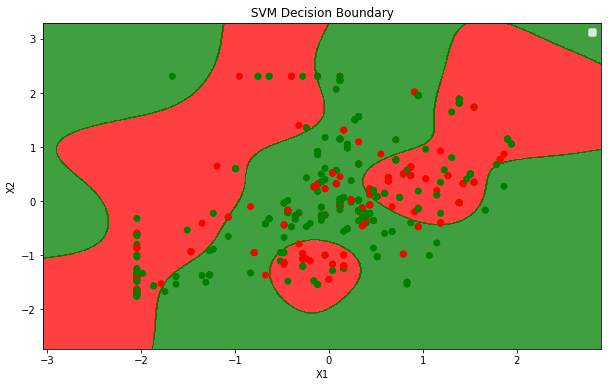

In [105]:
plot_decision_boundary_1(X_test_2,y_test_2, svc_classifier_13)

### Observation
####  Gamma which is a measure of curvature ,if the value of gamma is comperatively high then less number of points clubbed together  or simmilarity distance is small ...
####  C value  which is a penalty parameter ,the more the value of c the lesser the margin  with less number of misclassification


###  So by tweaking these two parameters :
####  1. we get better accuracy
####  2. less number of misclassification

In [108]:
svc_classifier_13.classes_

array([0, 1])

In [109]:
svc_classifier_13.decision_function

<bound method BaseSVC.decision_function of SVC(C=5.0, class_weight={0: 2.72, 1: 1}, gamma=1.0)>

### Support vectors

In [116]:
vec=svc_classifier_13.support_vectors_
vec

array([[ 4.75087662e-01,  1.93016069e-01],
       [-1.19874763e-01,  3.14135277e-01],
       [ 6.33744309e-01,  3.75502342e-01],
       [-4.76852218e-01, -1.13606537e+00],
       [ 5.94080147e-01,  1.44568386e-01],
       [ 4.35423500e-01,  1.26804236e-01],
       [-2.38867248e-01,  1.35737538e+00],
       [-2.04358660e+00, -1.62377205e+00],
       [-2.04358660e+00, -1.63023174e+00],
       [ 4.75087662e-01,  1.78481764e-01],
       [ 1.57774368e-01, -9.93952166e-01],
       [ 3.56095177e-01, -4.56182884e-01],
       [ 6.33744309e-01,  3.75502342e-01],
       [ 5.54415985e-01,  8.72898554e-01],
       [-4.05464399e-02, -9.97182011e-01],
       [-2.04358660e+00, -1.71905249e+00],
       [-2.78531410e-01, -1.07146846e+00],
       [-3.97523895e-01,  2.31017982e+00],
       [-4.37188057e-01, -1.68726631e-01],
       [ 1.18110207e-01, -2.66134274e-02],
       [ 4.35423500e-01,  2.26929447e-01],
       [-2.04358660e+00, -1.32824118e+00],
       [ 3.16431015e-01, -1.78416168e-01],
       [ 9.

### Support Vectors plot

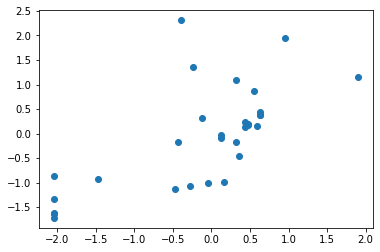

In [153]:
plt.scatter(vec[0:30,0],vec[0:30,1],cmap='rainbow',label="support_vecs")

### Data Points Plot with Support Vectors

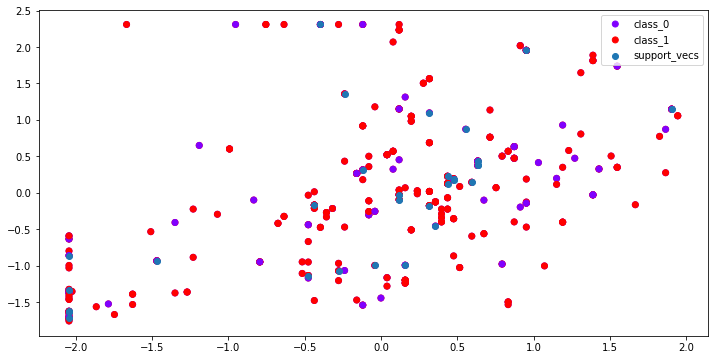

In [155]:
plt.figure(figsize=(12,6))
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],c=y_train.values==0,label="class_0",cmap='rainbow')
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1],label="class_1",c=y_train.values==1,cmap='rainbow')
plt.scatter(vec[0:30,0],vec[0:30,1],cmap='rainbow',label="support_vecs")
plt.legend(loc="best")

### Performance For Test data

Overall Accuracy :  0.8141
Precision        :  0.8014
Recall           :  0.9912
AUC Score        :  0.6623
Confusion Matrix :


Text(0.5, 1.0, 'Prediction Vs Actual')

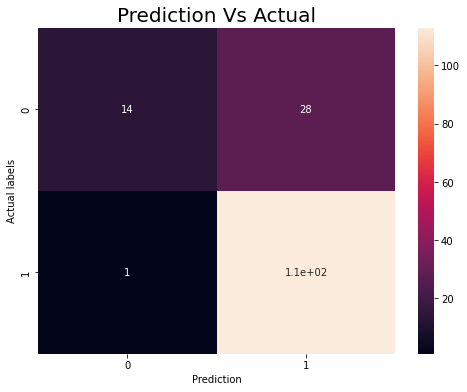

In [117]:
svc_classifier_13 = SVC(kernel='rbf',class_weight={1 : 1,  0 : 2.72}, C=5.0, degree=3, gamma=1.0)
svc_classifier_13.fit(X_train,y_train)
y_pred = svc_classifier_13.predict(X_test)

print("Overall Accuracy : ",round(accuracy_score(y_test,y_pred),4))
print("Precision        : ",round(precision_score(y_test,y_pred),4))
print("Recall           : ",round(recall_score(y_test,y_pred),4))
print("AUC Score        : ",round(roc_auc_score(y_test,y_pred),4))
print("Confusion Matrix :")
plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,annot=True
            )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)